<a href="https://colab.research.google.com/github/ftk1000/torch_demos/blob/master/poly_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://github.com/pytorch/examples/blob/master/regression/main.py

from __future__ import print_function
from itertools import count

import torch
import torch.nn.functional as F

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5


In [2]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)


def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target.item()


def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, i + 1)
    result += '{:+.2f}'.format(b[0])
    return result


def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y


In [3]:
# Define model
fc = torch.nn.Linear(W_target.size(0), 1)

for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch()

    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.item()

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad)

    # Stop criterion
    if loss < 1e-3:
        break

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.view(-1), fc.bias))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

Loss: 0.000997 after 280 batches
==> Learned function:	y = -4.02 x^1 +1.11 x^2 -2.39 x^3 -2.86 x^4 -0.16
==> Actual function:	y = -4.09 x^1 +1.17 x^2 -2.37 x^3 -2.87 x^4 -0.18


# ZOOM IN

In [61]:
import torch
import torch.nn.functional as F

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5
print(W_target)
print(b_target)

# Define model
fc = torch.nn.Linear(W_target.size(0), 1)
fc

tensor([[ 0.4775],
        [ 1.2207],
        [-5.5769],
        [-6.5835]])
tensor([-1.7811])


Linear(in_features=4, out_features=1, bias=True)

# GENERATE DATA

In [56]:
##### get batch
"""Builds a batch i.e. (x, f(x)) pair."""
batch_size=32
random = torch.randn(batch_size)
### x = make_features(random)
"""Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
x = random.unsqueeze(1)
batch_x = torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)
# return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)

batch_y = batch_x.mm(W_target) + b_target.item()
# return x, y

print(batch_x[:2])
print(batch_y[:2])

tensor([[1.6894e-01, 2.8539e-02, 4.8213e-03, 8.1449e-04],
        [4.9287e-02, 2.4292e-03, 1.1973e-04, 5.9009e-06]])
tensor([[2.8941],
        [2.1168]])


# TARINING STEP

In [55]:
# Reset gradients
fc.zero_grad()

# Forward pass
output = F.smooth_l1_loss(fc(batch_x), batch_y)
print(output)
loss = output.item()
print(loss)

# Backward pass
output.backward()

# Apply gradients
for param in fc.parameters():
    param.data.add_(-0.1 * param.grad)


tensor(2.5083, grad_fn=<SmoothL1LossBackward>)
2.508268356323242


# TRAIN LOOP

In [62]:
losses=[]
Nsteps = 1000
for i in range(Nsteps):
  # Reset gradients
  fc.zero_grad()

  # Forward pass
  output = F.smooth_l1_loss(fc(batch_x), batch_y)
  # print(output)
  loss = output.item()
  # print(loss)

  # Backward pass
  output.backward()

  # Apply gradients
  for param in fc.parameters():
      param.data.add_(-0.1 * param.grad)
  losses.append(loss)
  # print(fc.parameters)

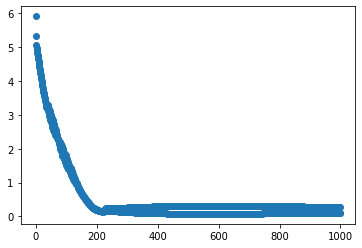

In [63]:
import matplotlib.pyplot as plt
steps = range(len(losses))
plt.scatter(steps, losses)

In [65]:
losses[-10:]

[0.2815361022949219,
 0.11445458978414536,
 0.2813122272491455,
 0.11467129737138748,
 0.28108853101730347,
 0.11488839983940125,
 0.2808656692504883,
 0.11510414630174637,
 0.2806429862976074,
 0.11532025039196014]

In [13]:
# for i in count(1):
#   print(i)
#   if (i>2):
#     break

# torch.randn(32)[:5]

batch_x, batch_y = get_batch()
print(batch_x.shape, batch_y.shape)



torch.Size([32, 4]) torch.Size([32, 1])


In [18]:
x=batch_x.unsqueeze(1)[:2]
x

tensor([[[ 0.2219,  0.0492,  0.0109,  0.0024]],

        [[-1.0152,  1.0307, -1.0464,  1.0623]]])

In [19]:
[x ** i for i in range(1, POLY_DEGREE+1)]

[tensor([[[ 0.2219,  0.0492,  0.0109,  0.0024]],
 
         [[-1.0152,  1.0307, -1.0464,  1.0623]]]),
 tensor([[[4.9236e-02, 2.4242e-03, 1.1936e-04, 5.8767e-06]],
 
         [[1.0307e+00, 1.0623e+00, 1.0949e+00, 1.1285e+00]]]),
 tensor([[[ 1.0925e-02,  1.1936e-04,  1.3040e-06,  1.4246e-08]],
 
         [[-1.0464e+00,  1.0949e+00, -1.1456e+00,  1.1988e+00]]]),
 tensor([[[2.4242e-03, 5.8767e-06, 1.4246e-08, 3.4535e-11]],
 
         [[1.0623e+00, 1.1285e+00, 1.1988e+00, 1.2734e+00]]])]

In [24]:
batch_y[:3]

tensor([[-1.0665],
        [ 4.6072],
        [-8.5152]])

In [23]:
# batch_y.mm(W_target) + b_target.item()
# batch_y.mm(W_target) 